ADF Statistic (Original): -0.9169719313810456
p-value (Original): 0.7823319492318603

ADF Statistic (Differenced): -40.088968721571966
p-value (Differenced): 0.0


<class 'pandas.DatetimeIndex'>


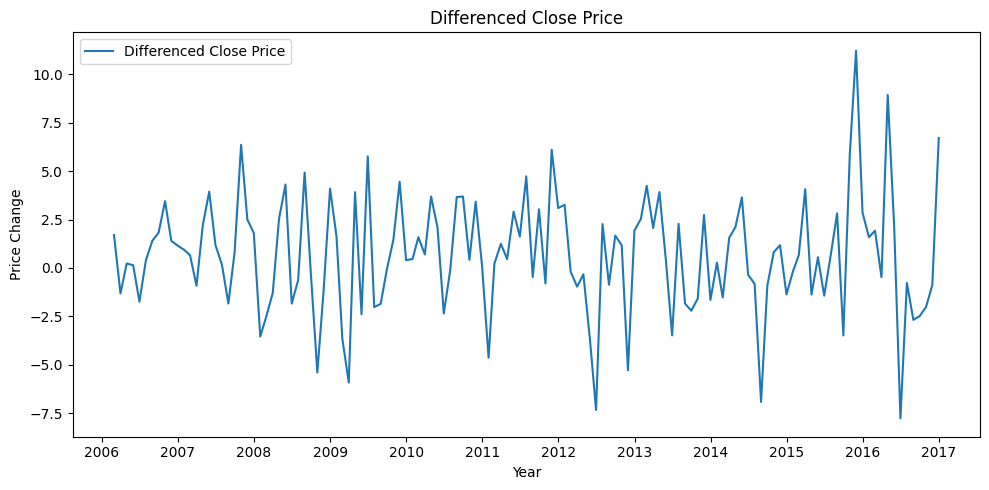

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
df = pd.read_csv("p1.csv")

# Force datetime conversion (KEY FIX)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set Date as index
df.set_index('Date', inplace=True)

# Confirm index type (optional check)
print(type(df.index))  # must be DatetimeIndex

# Convert to monthly data
df_monthly = df['Close'].resample('ME').mean()

# First-order differencing
diff_series = df_monthly.diff().dropna()

# Plot (match sample)
plt.figure(figsize=(10,5))
plt.plot(diff_series, label='Differenced Close Price')

plt.title('Differenced Close Price')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()

# Clean x-axis (years only)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()
